<b>BDS^3</b> Ukrainian Biological Data Science School

2024-06, Uzhzhorod 

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b> 🦠 Курс "Аналіз мікробіому. Пошук ассоціацій з хворобами"</b> 

<i> by Kateryna Pantiukh </i> 
https://github.com/Chartiza 
</div>

**Практичний блок 2. Metagenome profiling**

Приклади результатів найпоширеніших програм для профілювання метагеному. Аналіз продуктивності програм за допомогою штучних даних. Вивчення barplot, swarmplot, scatterplot. 


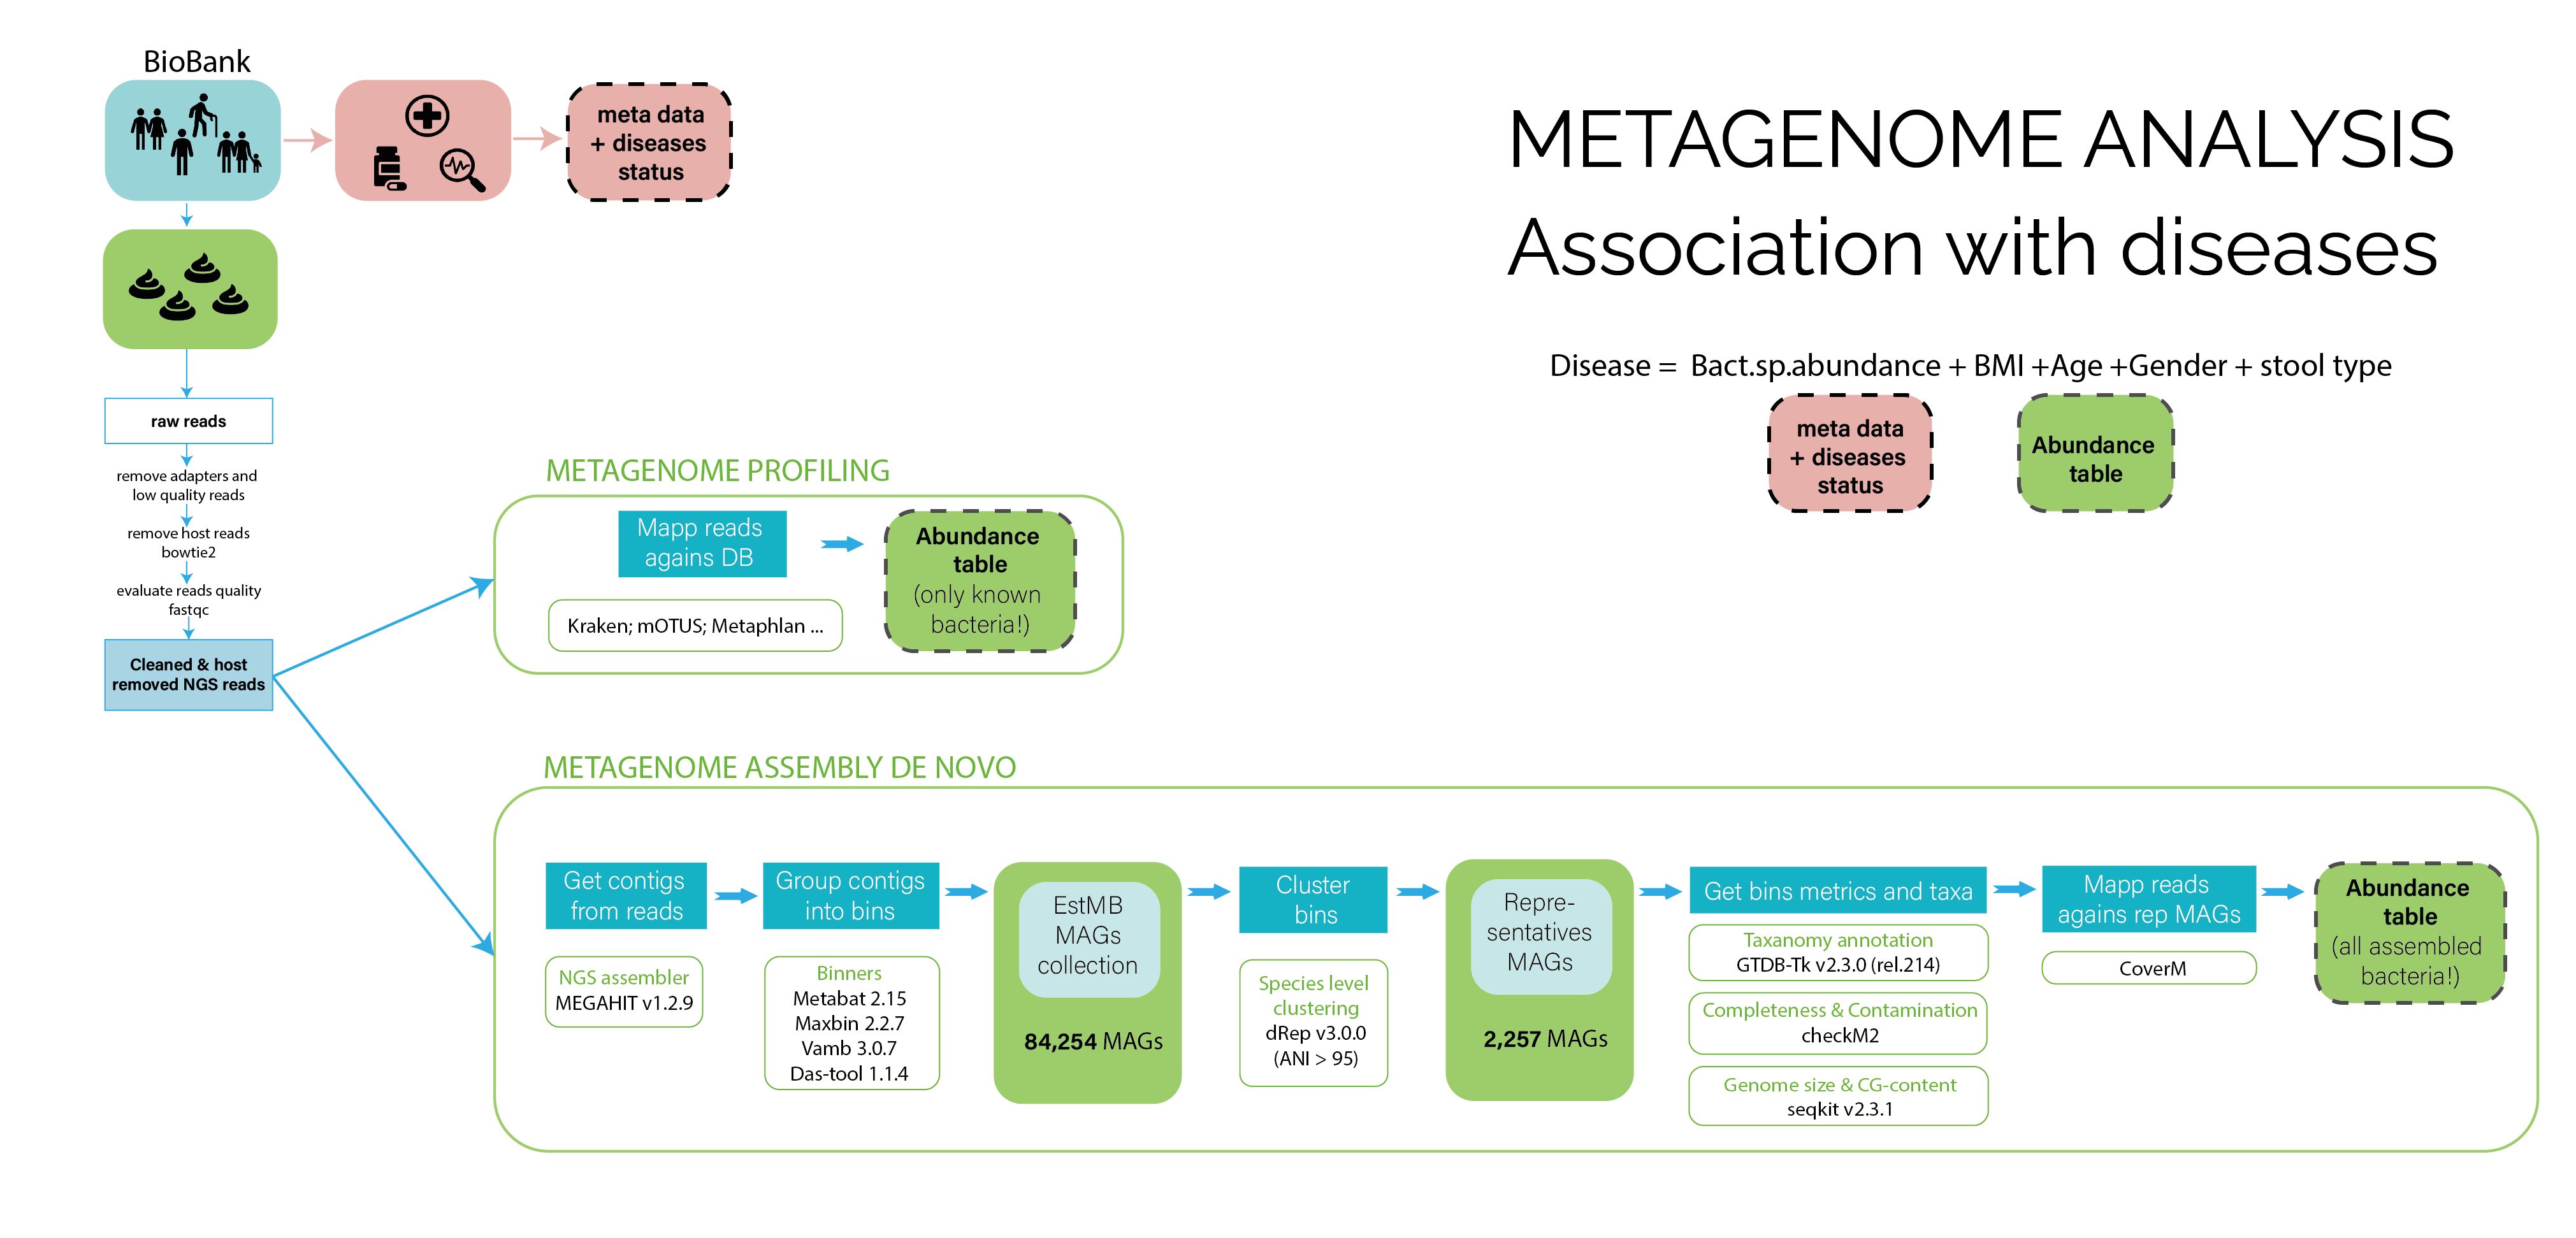

<p><div class="alert-success" style="padding: 20px; border-radius: 10px">
<b> PACKAGES </b> </div>


- Перед початком роботи треба "включити" пакети, які ми будемо використовувати. 
- Якщо це перший раз використання, спочатку требя їх встановити на компьютер за допомогою команді **% pip install package-name**, як наприклад:

<i> % pip install pandas </i>

- Після того як пакети встановленні кожен наступни раз пакет можно зразу "підключити" за допомогою команди **import package-name**

- Для виконання команди треба буде писати назву пакету, тому для зручності ми можемо скоротити назву за допомогою команди **as short_name**, наприклад:

<i> import pandas as pd </i>


In [20]:
#%pip install pandas

In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Read mock community data

<b> Mock Community Data:</b> 
Це штучно створені дані, що імітують характеристики реальної спільноти. Вони використовуються для тестування та валідації систем, алгоритмів або програмного забезпечення в умовах, що наближаються до реальних. 

<b>ZymoBIOMICS® Gut Microbiome Standard</b> is a mixture of 18 bacterial strains, 2 fungal strains, and 1 archaeal strain in staggered abundances to mimic a true gut microbiome. The standard presents multiple challenges for NGS pipelines, such as tough-to-lyse Gram-positive bacteria (e.g. Roseburia hominis) to test lysis efficiency, genomes with a wide range of GC content to test sequencing coverage bias, low-abundance pathogenic organisms for detection limit assessment and 5 different strains of E. coli to test taxonomic resolution. These challenge points can be used to expose artifacts, errors, and bias in microbiomics or metagenomics workflows. Serving as a defined input, this standard can be used to guide construction and optimization of entire workflows or as a quality control tool for inter-lab studies.

The microbial standard is accurately characterized and contains negligible impurity (< 0.01%). It was constructed by pooling cells from pure cultures of 21 microbial strains. The cells from each pure culture were quantified before pooling. After mixing, the microbial composition was confirmed using NGS-based sequencing.

In [2]:
# зчитуємо дані
std = pd.read_excel('input/mock_standard.xlsx')
# remove space at the end of species names
std['Species'] = std['Species'].str.strip()
std.head(2)

,Species,std_abundance
0,Faecalibacterium prausnitzii,14.77
1,Veillonella rogosae,19.94


<b>Завдання:</b> 
Проаналізуйте отриманий датафрейм. 
- Які стовбці ми маємо, скільки видів бактерій? 
- чи всі вони унікальні? 
- яка мінімальна, максимальна та середня відносна відносна чисельність бактерій?
- які ще якості буде корисно подивитись?

<details>
  <summary> Підказка </summary>
  
  std.head(2)
  
  std.tail(2)
  
  len(std['Species'])
  
  len(std['Species'].unique())
  
  std['std_abundance'].min()
  
  std['std_abundance'].max()
  
  std['std_abundance'].mean()

  std.isnull().values.any()

</details>

# Bar plot

<Axes: xlabel='std_abundance', ylabel='Species'>

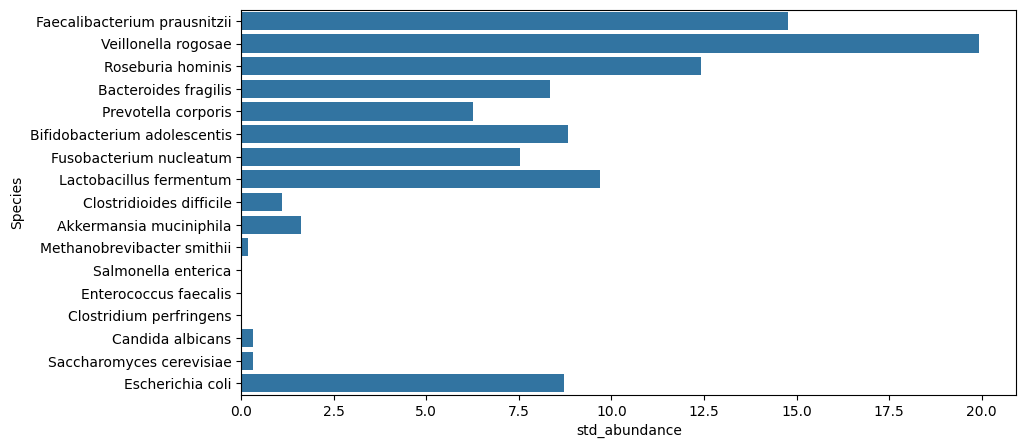

In [3]:
# Візуалізація даних
plt.figure(figsize=(10, 5))
sns.barplot(x='std_abundance', y='Species', data=std)

<b>Завдання:</b> 
- Відсортуйте види за спаданням їх відносної кількості. 
- Намалюйте новий графік з відносною кількістю видів бактерій. 
- Для візуалізації використайте ваш улюблений колір.
- додайте курсив до назв видів бактерій
- Подумайте чи можна ще якось вдосконалити графік?

<details>
  <summary> Підказка </summary>
  
  std = std.sort_values('std_abundance', ascending=False)
  
  plt.yticks(fontstyle='italic')  

</details>

<p><div class="alert-success" style="padding: 20px; border-radius: 10px">
<b> KRAKEN </b> </div>

Metagenome profiling program 
https://github.com/DerrickWood/kraken

In [4]:
# Show original file
# Karaken + Braken results
bra = pd.read_csv('input/mock.bracken', sep='\t')
bra.head(5)


,name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads
0,Faecalibacterium prausnitzii_E,50115,S,2732871,218706,2951577,0.16067
1,Faecalibacterium prausnitzii_D,50114,S,48882,7395,56277,0.00306
2,Faecalibacterium sp934513205,50142,S,42512,2357,44869,0.00244
3,Faecalibacterium hattorii,50108,S,32761,2974,35735,0.00195
4,Faecalibacterium prausnitzii_I,50117,S,30704,1834,32538,0.00177


In [5]:
# Karaken + Braken results
bra = pd.read_csv('input/mock.bracken', sep='\t')
# change column name 'name' to 'Species'
bra = bra.rename(columns={'name':'Species'})

mrg_bra = pd.merge(bra, std, on='Species', how='outer').sort_values(by='std_abundance')

# if metaplane_abundance & std_abundance not null add value present in new column 'status'
mrg_bra['status'] = mrg_bra.apply(lambda x: 'detected' if pd.notnull(x['fraction_total_reads']) and pd.notnull(x['std_abundance']) else '', axis=1)
mrg_bra['status'] = mrg_bra.apply(lambda x: 'false positive' if pd.notnull(x['fraction_total_reads']) and pd.isnull(x['std_abundance']) else x['status'], axis=1)
mrg_bra['status'] = mrg_bra.apply(lambda x: 'not detected' if pd.isnull(x['fraction_total_reads']) and pd.notnull(x['std_abundance']) else x['status'], axis=1)

# add new column abundane. if metaplane_abundance & std_abundance not null fill it with std_abundance value
mrg_bra['abundance'] = mrg_bra.apply(lambda x: x['std_abundance'] if pd.notnull(x['std_abundance']) else x['fraction_total_reads'], axis=1)

mrg_bra.to_excel('results/mock_braken.xlsx', index=False)
mrg_bra.head(5)

,Species,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,std_abundance,status,abundance
3049,Clostridium perfringens,NaN,NaN,NaN,NaN,NaN,NaN,0.00009,not detected,0.00009
2655,Enterococcus faecalis,48771.0,S,139.0,5.0,144.0,0.00001,0.00110,detected,0.00110
1892,Salmonella enterica,94937.0,S,3524.0,276.0,3800.0,0.00021,0.00700,detected,0.00700
3048,Methanobrevibacter smithii,NaN,NaN,NaN,NaN,NaN,NaN,0.17000,not detected,0.17000
3050,Candida albicans,NaN,NaN,NaN,NaN,NaN,NaN,0.31000,not detected,0.31000


<details>
    <summary> Пояснення. lambda функція </summary>
  
    Метод apply:

    Метод apply використовується для застосування функції вздовж осі DataFrame.
    Аргумент axis=1 означає, що функція застосовується до кожного рядка. Якщо б використовувався axis=0, функція застосовувалась би до кожного стовпця.
    
    Lambda Функція:

    lambda функція - це анонімна функція, визначена за допомогою ключового слова lambda.
    У цьому контексті вона використовується для створення простої функції, що приймає рядок (x) як вхідний параметр.
    
    Логіка Функції:

    pd.notnull(x['fraction_total_reads']): Це перевіряє, чи значення у стовпці fraction_total_reads поточного рядка (x) не є null.
    pd.notnull(x['std_abundance']): Це перевіряє, чи значення у стовпці std_abundance поточного рядка (x) не є null.
    якщо ... і ... інакше ...: Це умовний (тернарний) оператор, що повертає 'виявлено', якщо обидві умови True, інакше повертає порожній рядок ''.
    
    Повернуте Значення:

    Для кожного рядка у DataFrame mrg_bra, метод apply застосовує lambda функцію. Якщо fraction_total_reads і std_abundance не є null, повертає 'виявлено'; інакше повертає порожній рядок.
    
</details>

<b>Завдання:</b> 
- Проаналізуйте результат. Що ми можемо сказати про программу Kraken? 

<details>
  <summary> Підказка </summary>
  
  - Щоб зробити висновок перевірте скільки видів бактерій, які присутні в зразку були коректно знайдені програмою. 
  - Чи є види, які не були знайдені (false negative)? 
  - Чи є види які були знайдені хоча вони не присутні у зразку (false positives)?

</details>

<p><div class="alert-success" style="padding: 20px; border-radius: 10px">
<b> MetaPhlAn </b> </div>

Metagenome profiling program 
https://github.com/biobakery/MetaPhlAn

In [6]:
# read data. Metaplan
tax = pd.read_csv('input/mock_Metaplan.txt', sep='\t', names=["clade_name", "NCBI_tax_id",
                   "metaplane_abundance", "additional_species"], skiprows=4)

tax.head(5)

,clade_name,NCBI_tax_id,metaplane_abundance,additional_species
0,k__Bacteria,2,99.70188,NaN
1,k__Archaea,2157,0.15262,NaN
2,k__Eukaryota,2759,0.14549,NaN
3,k__Bacteria|p__Bacteroidetes,2|976,32.51553,NaN
4,k__Bacteria|p__Firmicutes,2|1239,32.34157,NaN


In [8]:
# read data and compare with standard. Metaplan
tax = pd.read_csv('input/mock_Metaplan.txt', sep='\t', names=["clade_name", "NCBI_tax_id",
                   "metaplane_abundance", "additional_species"], skiprows=4)
# select only species information
taxU = tax[tax['clade_name'].str.contains("s__")].copy()  
newR = taxU['clade_name'].str.split(pat='s__', expand=True)
taxU.loc[:, 'Species'] = newR[1].values  

data = taxU[['Species', 'metaplane_abundance']]
# change '_' to ' ' in species names
data['Species'] = data['Species'].str.replace('_', ' ')
# remove space at the end of species names
data['Species'] = data['Species'].str.rstrip()

# merge with standard data
mrg_met = pd.merge(data, std, on='Species', how='outer')

# if metaplane_abundance & std_abundance not null add value present in new column 'status'
mrg_met['status'] = mrg_met.apply(lambda x: 'detected' if pd.notnull(x['metaplane_abundance']) and pd.notnull(x['std_abundance']) else '', axis=1)
mrg_met['status'] = mrg_met.apply(lambda x: 'false positive' if pd.notnull(x['metaplane_abundance']) and pd.isnull(x['std_abundance']) else x['status'], axis=1)
mrg_met['status'] = mrg_met.apply(lambda x: 'not detected' if pd.isnull(x['metaplane_abundance']) and pd.notnull(x['std_abundance']) else x['status'], axis=1)

# add new column abundane. if metaplane_abundance & std_abundance not null fill it with std_abundance value
mrg_met['abundance'] = mrg_met.apply(lambda x: x['std_abundance'] if pd.notnull(x['std_abundance']) else x['metaplane_abundance'], axis=1)

# save result table to file
mrg_met.to_excel('results/mock_metaphlan.xlsx', index=False)
mrg_met.head(2)


/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_62925/2695482579.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species'] = data['Species'].str.replace('_', ' ')
/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_62925/2695482579.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species'] = data['Species'].str.rstrip()


,Species,metaplane_abundance,std_abundance,status,abundance
0,Bacteroides fragilis,20.46364,8.33,detected,8.33
1,Escherichia coli,18.90745,8.71,detected,8.71


<b>Завдання:</b> 
- Проаналізуйте результат. Що ми можемо сказати про программу MetaPhlAn? 

<p><div class="alert-success" style="padding: 20px; border-radius: 10px">
<b> mOTUs </b> </div>

Metagenome profiling program 
https://github.com/motu-tool/mOTUs


In [9]:
# mOTUs
motus = pd.read_csv('input/mock.motus', sep='\t')
motus.head(2)

,consensus_taxonomy,unnamed sample
0,Leptospira alexanderi [ref_mOTU_v3_00001],0.0
1,Leptospira weilii [ref_mOTU_v3_00002],0.0


In [10]:
# mOTUs
motus = pd.read_csv('input/mock.motus', sep='\t')
motus = motus[motus['unnamed sample'] > 0]
# slpit column by [
motus['Species'] = motus['consensus_taxonomy'].str.split('[').str[0]
motus = motus[['Species', 'unnamed sample']]
# change column name
motus = motus.rename(columns={'unnamed sample':'motus_abundance'})
# drop space at the end of Species name
motus['Species'] = motus['Species'].str.rstrip()

mrg_motus = pd.merge(motus, std, on='Species', how='outer').sort_values(by='std_abundance')

# if metaplane_abundance & std_abundance not null add value present in new column 'status'
mrg_motus['status'] = mrg_motus.apply(lambda x: 'detected' if pd.notnull(x['motus_abundance']) and pd.notnull(x['std_abundance']) else '', axis=1)
mrg_motus['status'] = mrg_motus.apply(lambda x: 'false positive' if pd.notnull(x['motus_abundance']) and pd.isnull(x['std_abundance']) else x['status'], axis=1)
mrg_motus['status'] = mrg_motus.apply(lambda x: 'not detected' if pd.isnull(x['motus_abundance']) and pd.notnull(x['std_abundance']) else x['status'], axis=1)

# add new column abundane. if metaplane_abundance & std_abundance not null fill it with std_abundance value
mrg_motus['abundance'] = mrg_motus.apply(lambda x: x['std_abundance'] if pd.notnull(x['std_abundance']) else x['motus_abundance'], axis=1)

mrg_motus.to_excel('results/mock_motus.xlsx', index=False)
mrg_motus.head(3)

,Species,motus_abundance,std_abundance,status,abundance
18,Clostridium perfringens,NaN,0.00009,not detected,0.00009
17,Enterococcus faecalis,NaN,0.00110,not detected,0.00110
1,Salmonella enterica,0.000466,0.00700,detected,0.00700


<b>Завдання:</b> 
- Проаналізуйте результат. Що ми можемо сказати про программу mOTUs? 

<p><div class="alert-success" style="padding: 20px; border-radius: 10px">
<b> Visualisation and Comparison the results </b> </div>

Візуалізація коректно виявлених видів, false negative & false positives для оцінки роботи програм.

# Swarmplot

/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_62925/3645169111.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=mrg_met, y='abundance', x='status', palette=['#70bb03','#f26b58','grey'])


Text(0.5, 25.722222222222214, '')

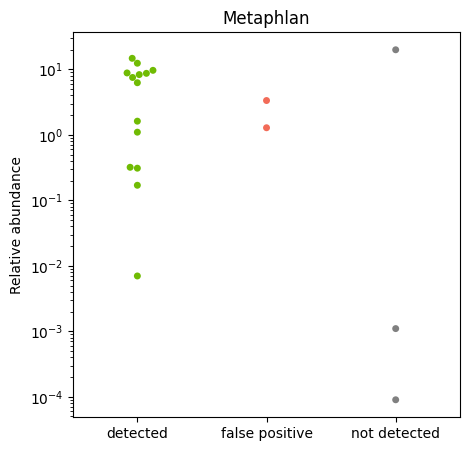

In [13]:
# fig size
plt.figure(figsize=(5, 5))

plt.yscale("log")
sns.swarmplot(data=mrg_met, y='abundance', x='status', palette=['#70bb03','#f26b58','grey'])
plt.title('Metaphlan')
plt.ylabel('Relative abundance')
plt.xlabel('')

#plt.savefig('results/Metaphlan.png', dpi=300, bbox_inches='tight')

/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_36206/4135553602.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=mrg_met, y='abundance', x='status', palette=['green','red','grey'], ax=axes[0])
/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_36206/4135553602.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=mrg_bra, y='abundance', x='status', palette=['green','red','grey'], ax=axes[1])
/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ketpantuh/Library/

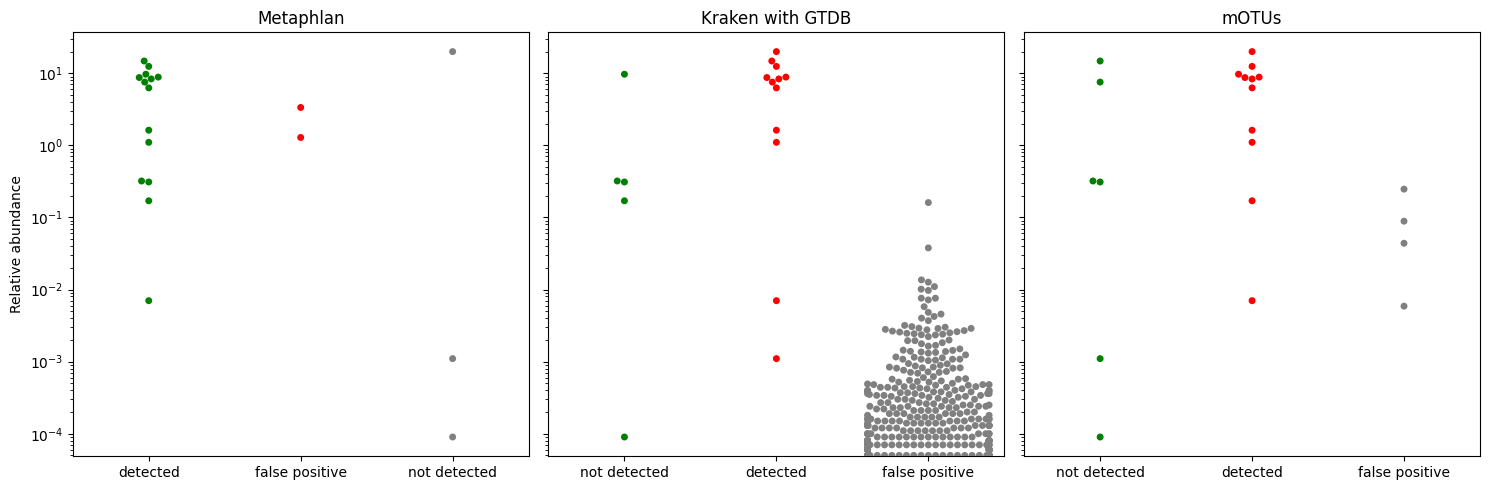

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Увага! Цей код потребує трошки часу на виконання! 

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# First subplot
axes[0].set_yscale("log")
sns.swarmplot(data=mrg_met, y='abundance', x='status', palette=['#70bb03','#f26b58','grey'], ax=axes[0])
axes[0].set_title('Metaphlan')
axes[0].set_ylabel('Relative abundance')
axes[0].set_xlabel('')

# Second subplot
axes[1].set_yscale("log")
sns.swarmplot(data=mrg_bra, y='abundance', x='status', palette=['green','red','grey'], ax=axes[1])
axes[1].set_title('Kraken with GTDB')
axes[1].set_ylabel('')
axes[1].set_xlabel('')

# Third subplot
axes[2].set_yscale("log")
sns.swarmplot(data=mrg_motus, y='abundance', x='status', palette=['green','red','grey'], ax=axes[2])
axes[2].set_title('mOTUs')
axes[2].set_ylabel('')
axes[2].set_xlabel('')

# Adjust layout
plt.tight_layout()

# Save the figure
#plt.savefig('results/mOTUs.png', dpi=300, bbox_inches='tight')
#plt.savefig('results/mOTUs.svg', bbox_inches='tight')

# Show plot
plt.show()


<b>Завдання:</b> 
- Проаналізуйте результат. Який висновок ми можемо зробити щодо перформанса кожної програми?

# Scatterplot
Проаналізувати корекність виявлення відносної кількості бактерій.

In [14]:
mrg_met.head(2)

,Species,metaplane_abundance,std_abundance,status,abundance
0,Bacteroides fragilis,20.46364,8.33,detected,8.33
1,Escherichia coli,18.90745,8.71,detected,8.71


(-1.0, 20.0)

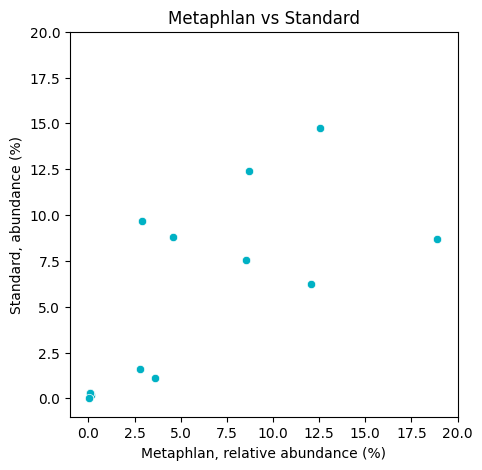

In [17]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=mrg_met, x='metaplane_abundance', y='std_abundance', color='#00b1c4')
plt.xlabel('Metaphlan, relative abundance (%)')
plt.ylabel('Standard, abundance (%)')
plt.title('Metaphlan vs Standard')
plt.xlim(-1, 20)
plt.ylim(-1, 20)

#plt.savefig('results/metaphlan_vs_standard.png', dpi=300, bbox_inches='tight')

In [21]:
# calculate r2 value
from scipy.stats import linregress

# Extract the columns from the DataFrame
x = mrg_met['metaplane_abundance']
y = mrg_met['std_abundance']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the R-squared value
r_squared = r_value**2
r_squared



nan

Чому не працює?

In [22]:
# check column datatype
mrg_met.dtypes

Species                 object
metaplane_abundance    float64
std_abundance          float64
status                  object
abundance              float64
dtype: object

In [24]:
# visual check df
mrg_met

,Species,metaplane_abundance,std_abundance,status,abundance
0,Bacteroides fragilis,20.46364,8.33000,detected,8.33000
1,Escherichia coli,18.90745,8.71000,detected,8.71000
2,Faecalibacterium prausnitzii,12.54292,14.77000,detected,14.77000
3,Prevotella corporis,12.05189,6.26000,detected,6.26000
4,Roseburia hominis,8.67727,12.43000,detected,12.43000
5,Fusobacterium nucleatum,8.53479,7.53000,detected,7.53000
6,Bifidobacterium adolescentis,4.59147,8.83000,detected,8.83000
7,Clostridioides difficile,3.60509,1.10000,detected,1.10000
8,Veillonella dispar,3.34746,NaN,false positive,3.34746
9,Lactobacillus fermentum,2.88391,9.68000,detected,9.68000


In [25]:
# drop NA raws
mrg_met = mrg_met.dropna(subset=['metaplane_abundance', 'std_abundance'])
mrg_met

,Species,metaplane_abundance,std_abundance,status,abundance
0,Bacteroides fragilis,20.46364,8.330,detected,8.330
1,Escherichia coli,18.90745,8.710,detected,8.710
2,Faecalibacterium prausnitzii,12.54292,14.770,detected,14.770
3,Prevotella corporis,12.05189,6.260,detected,6.260
4,Roseburia hominis,8.67727,12.430,detected,12.430
5,Fusobacterium nucleatum,8.53479,7.530,detected,7.530
6,Bifidobacterium adolescentis,4.59147,8.830,detected,8.830
7,Clostridioides difficile,3.60509,1.100,detected,1.100
9,Lactobacillus fermentum,2.88391,9.680,detected,9.680
10,Akkermansia muciniphila,2.80919,1.620,detected,1.620


In [26]:
# calculate r2 value
from scipy.stats import linregress

# Extract the columns from the DataFrame
x = mrg_met['metaplane_abundance']
y = mrg_met['std_abundance']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the R-squared value
r_squared = r_value**2
r_squared

0.431271042079431

<b>Завдання:</b> 
- Порахуйте R2 для інших програм. Зробіть висновки.

<b>Завдання:</b> 
- Які загальні висновки ми можемо зробити?